# Application of Decision Tree Classifier

## Decision Tree Classifier with Iris dataset

### Setup

In [1]:
# common lib
import sklearn
import numpy as np

### Datasets



#### Iris dataset

In [2]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_X = iris.data
iris_y = iris.target
iris_feature_names = iris.feature_names
iris_class_names = iris.target_names

print('Number of targets: ',len(iris_class_names))

# combine features and class data
iris_np = np.append(iris_X, iris_y.reshape(-1,1), axis=1)
iris_col_names = iris_feature_names + ['class']

iris_pd = pd.DataFrame(iris_np, columns=iris_col_names)
iris_pd.head(3)

Number of targets:  3


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0


### Preprocess

#### train_test_split

In [3]:
from sklearn.model_selection import train_test_split
iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(iris_X, iris_y, random_state=42)

### DecisionTree Classifier



**- sklearn.tree.[DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) : Returns the instance itself.**

A decision tree classifier.

In [4]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(iris_X_train, iris_y_train)

DecisionTreeClassifier(random_state=42)

#### Evaluation

In [5]:
from sklearn import metrics

predict = dt_model.predict(iris_X_train)
acc = metrics.accuracy_score(iris_y_train, predict)
print('Train Accuracy(iris): {}'.format(acc))


predict = dt_model.predict(iris_X_test)
acc = metrics.accuracy_score(iris_y_test, predict)
print('Test Accuracy(iris): {}'.format(acc))


Train Accuracy(iris): 1.0
Test Accuracy(iris): 1.0


#### Visualization

##### Visualize by plot_tree

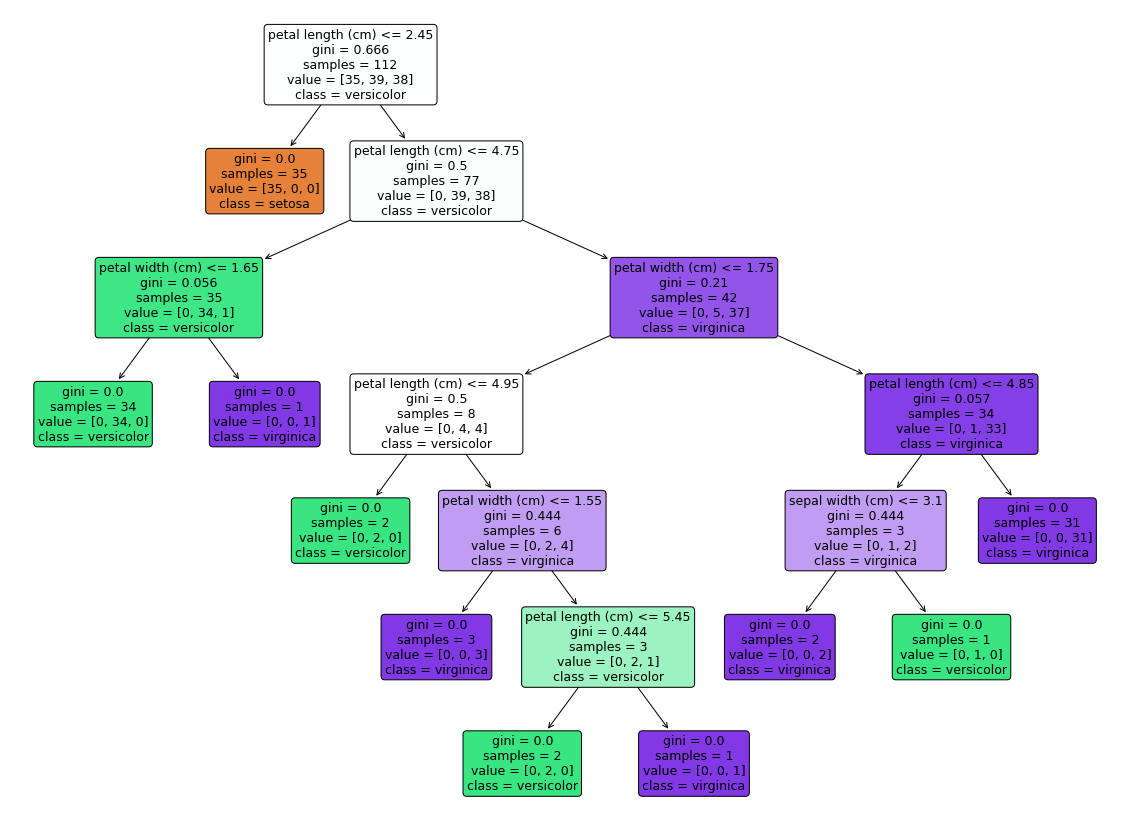

In [6]:
from sklearn import tree
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(20,15))
tree.plot_tree(dt_model, 
               class_names=iris_class_names,
               feature_names=iris_feature_names,
               impurity=True, filled=True,
               rounded=True)
plt.show()

##### Visualize by contourf 
Iris dataset with feature 2, 3 (petal length, petal width)


In [7]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:,2:]
y = iris.target

from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [8]:
def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3]):
    from matplotlib.colors import ListedColormap

    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s) 
    X_new = np.c_[x1.ravel(), x2.ravel()] 
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)

    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa") 
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
    plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
    
    plt.axis(axes)
    plt.xlabel("Petal length", fontsize=14)
    plt.ylabel("Petal width", fontsize=14)

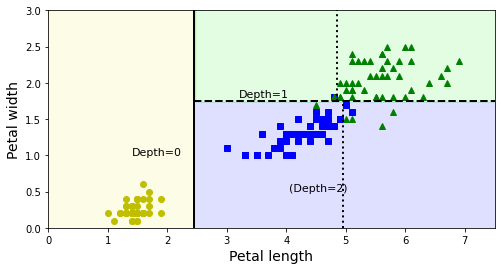

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=11)
plt.text(3.2, 1.80, "Depth=1", fontsize=11)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.show()

## Decision Tree Classifier with California Housing dataset

### Setup

In [10]:
# common lib
import sklearn
import numpy as np

### Datasets



#### California Housing dataset

* The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars.
* target값을 $100,000 기준으로 반올림하여 6개의 class로 범주화 함

In [11]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

housing = fetch_california_housing()
housing_X = housing.data
housing_y = np.round(housing.target).astype(int) # make y discrete
print('Number of target: ',len(set(housing_y)))

pd.DataFrame(housing_X, columns=housing.feature_names).head(3)

Number of target:  6


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24


### Preprocess

#### train_test_split

In [12]:
from sklearn.model_selection import train_test_split
housing_X_train, housing_X_test, housing_y_train, housing_y_test = train_test_split(housing_X, housing_y, random_state=42)

### DecisionTree Classifier



**- sklearn.tree.[DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) : Returns the instance itself.**

A decision tree classifier.

In [13]:
from sklearn.tree import DecisionTreeClassifier

dt_model_house = DecisionTreeClassifier(random_state=42)
dt_model_house.fit(housing_X_train, housing_y_train)

DecisionTreeClassifier(random_state=42)

#### Evaluation

In [14]:
from sklearn import metrics

predict = dt_model_house.predict(housing_X_train)
acc = metrics.accuracy_score(housing_y_train, predict)
print('Train Accuracy(housing): {}'.format(acc))


predict = dt_model_house.predict(housing_X_test)
acc = metrics.accuracy_score(housing_y_test, predict)
print('Test Accuracy(housing): {}'.format(acc))

Train Accuracy(housing): 1.0
Test Accuracy(housing): 0.623062015503876


#### Set parameter

**max_depth**
* default = None
* The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**
* int or float, default=1
  * If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.
* The minimum number of samples required to be at a leaf node.

**criterion**
* default = 'gini'
* ['gini', 'entropy']
* The function to measure the quality of a split.

max_depth 8 VS 16

In [15]:
# Default model
from sklearn.tree import DecisionTreeClassifier
dt_model_house = DecisionTreeClassifier(random_state=42)

# max_depth=8
dt_model_house.set_params(max_depth=8)
dt_model_house.fit(housing_X_train, housing_y_train)

predict = dt_model_house.predict(housing_X_train)
acc = metrics.accuracy_score(housing_y_train, predict)
print('train Accuracy(max_depth=8): {}'.format(acc))
predict = dt_model_house.predict(housing_X_test)
acc = metrics.accuracy_score(housing_y_test, predict)
print('Test Accuracy(max_depth=8): {}'.format(acc))

# max_depth=16
dt_model_house.set_params(max_depth=16)
dt_model_house.fit(housing_X_train, housing_y_train)

predict = dt_model_house.predict(housing_X_train)
acc = metrics.accuracy_score(housing_y_train, predict)
print('train Accuracy(max_depth=16): {}'.format(acc))
predict = dt_model_house.predict(housing_X_test)
acc = metrics.accuracy_score(housing_y_test, predict)
print('Test Accuracy(max_depth=16): {}'.format(acc))

train Accuracy(max_depth=8): 0.6892118863049096
Test Accuracy(max_depth=8): 0.6426356589147287
train Accuracy(max_depth=16): 0.9536175710594316
Test Accuracy(max_depth=16): 0.6381782945736434


min_samples_leaf 1 VS 16

In [16]:
# Default model
from sklearn.tree import DecisionTreeClassifier
dt_model_house = DecisionTreeClassifier(random_state=42)

# min_samples_leaf=1
dt_model_house.set_params(min_samples_leaf=1)
dt_model_house.fit(housing_X_train, housing_y_train)

predict = dt_model_house.predict(housing_X_train)
acc = metrics.accuracy_score(housing_y_train, predict)
print('train Accuracy(min_samples_leaf=1): {}'.format(acc))
predict = dt_model_house.predict(housing_X_test)
acc = metrics.accuracy_score(housing_y_test, predict)
print('Test Accuracy(min_samples_leaf=1): {}'.format(acc))

# min_samples_leaf=16
dt_model_house.set_params(min_samples_leaf=16)
dt_model_house.fit(housing_X_train, housing_y_train)

predict = dt_model_house.predict(housing_X_train)
acc = metrics.accuracy_score(housing_y_train, predict)
print('train Accuracy(min_samples_leaf=16): {}'.format(acc))
predict = dt_model_house.predict(housing_X_test)
acc = metrics.accuracy_score(housing_y_test, predict)
print('Test Accuracy(min_samples_leaf=16): {}'.format(acc))

train Accuracy(min_samples_leaf=1): 1.0
Test Accuracy(min_samples_leaf=1): 0.623062015503876
train Accuracy(min_samples_leaf=16): 0.7492248062015504
Test Accuracy(min_samples_leaf=16): 0.6507751937984496


criterion 'gini' VS 'entropy'

In [17]:
# Default model
from sklearn.tree import DecisionTreeClassifier
dt_model_house = DecisionTreeClassifier(random_state=42)

# criterion="gini"
dt_model_house.set_params(criterion="gini")
dt_model_house.fit(housing_X_train, housing_y_train)

predict = dt_model_house.predict(housing_X_train)
acc = metrics.accuracy_score(housing_y_train, predict)
print('train Accuracy(criterion="gini"): {}'.format(acc))
predict = dt_model_house.predict(housing_X_test)
acc = metrics.accuracy_score(housing_y_test, predict)
print('Test Accuracy(criterion="gini"): {}'.format(acc))

# criterion="entropy"
dt_model_house.set_params(criterion="entropy")
dt_model_house.fit(housing_X_train, housing_y_train)

predict = dt_model_house.predict(housing_X_train)
acc = metrics.accuracy_score(housing_y_train, predict)
print('train Accuracy(criterion="entropy"): {}'.format(acc))
predict = dt_model_house.predict(housing_X_test)
acc = metrics.accuracy_score(housing_y_test, predict)
print('Test Accuracy(criterion="entropy"): {}'.format(acc))

train Accuracy(criterion="gini"): 1.0
Test Accuracy(criterion="gini"): 0.623062015503876
train Accuracy(criterion="entropy"): 1.0
Test Accuracy(criterion="entropy"): 0.6391472868217054


### Validation_curve(max_depth)

* Visualization 함수

In [18]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# 수치형 파라미터 시각화 함수
def viz_val_curve(param_range, train_mean, train_std, test_mean, test_std, param_name, xscale_log=False):
  plt.plot(param_range, train_mean, 
          color='blue', marker='o', 
          markersize=5, label='Training accuracy')

  plt.fill_between(param_range, train_mean + train_std,
                  train_mean - train_std, alpha=0.15,
                  color='blue')

  plt.plot(param_range, test_mean, 
          color='green', linestyle='--', 
          marker='s', markersize=5, 
          label='Validation accuracy')

  plt.fill_between(param_range, 
                  test_mean + test_std,
                  test_mean - test_std, 
                  alpha=0.15, color='green')


  plt.grid()
  plt.legend(loc='lower right')
  if xscale_log:
    plt.xscale('log')
  plt.xlabel(param_name)
  plt.ylabel('Accuracy')
  plt.ylim([np.min(test_mean)*0.8, np.max(train_mean)*1.2])
  plt.tight_layout()
  plt.show()

# 범주형 파라미터 시각화 함수
def viz_val_bar(param_range, train_mean, train_std, test_mean, test_std, param_name):
  idx = np.arange(len(param_range))
  plt.bar(idx, test_mean, width=0.3)
  plt.xlabel(param_name)
  plt.ylabel('Accuracy')
  plt.ylim([np.min(test_mean)*0.9, np.max(test_mean)*1.1])
  plt.xticks(idx, param_range, fontsize=15)
  plt.show()

#### Validation_curve(max_depth)

#### **max_depth**
* default = None
* The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

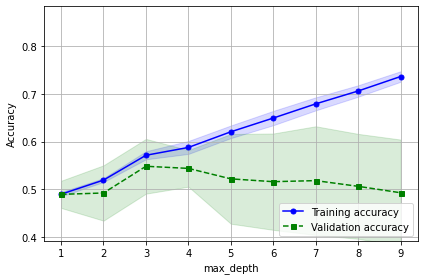

In [19]:
#housing
from sklearn.model_selection import validation_curve

param_range= [i for i in range(1,10)]
param_name='max_depth'

from sklearn.tree import DecisionTreeClassifier

dt_model_house_m = DecisionTreeClassifier(random_state=42)

train_scores, test_scores = validation_curve(
                estimator=dt_model_house_m, 
                X=housing_X, 
                y=housing_y, 
                param_name=param_name, 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

viz_val_curve(param_range, train_mean, train_std, test_mean, test_std, param_name)

#### Evaluation
**Default performance**
* Train Accuracy(housing): 1.0
* Test Accuracy(housing): 0.623062015503876

In [20]:
from sklearn.tree import DecisionTreeClassifier

proper_model_house_m = DecisionTreeClassifier(max_depth=3, random_state=42)
proper_model_house_m.fit(housing_X_train, housing_y_train)

from sklearn import metrics

predict = proper_model_house_m.predict(housing_X_train)
acc = metrics.accuracy_score(housing_y_train, predict)
print('Train Accuracy(housing_max_depth): {}'.format(acc))


predict = proper_model_house_m.predict(housing_X_test)
acc = metrics.accuracy_score(housing_y_test, predict)
print('Test Accuracy(housing_max_depth): {}'.format(acc))

Train Accuracy(housing_max_depth): 0.5694444444444444
Test Accuracy(housing_max_depth): 0.5598837209302325


# Application of Decision Tree Regression

## Decision Tree Classifier with Boston housing prices dataset

### Setup

In [21]:
# common lib
import sklearn
import numpy as np

### Datasets



#### Boston housing prices dataset

* The Boston housing prices dataset has an ethical problem. You can refer to the documentation of this function for further details.

In [22]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()
boston_X = boston.data
boston_y = boston.target

pd.DataFrame(boston_X, columns=boston.feature_names).head(3)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


### Preprocess

#### f-test based feature selection (1 feature)

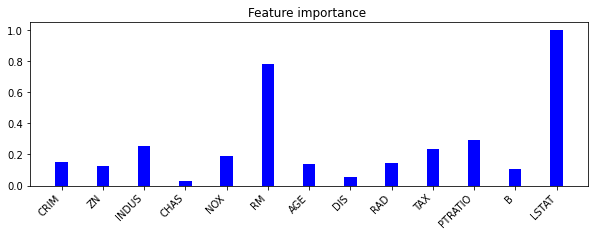

In [23]:
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import f_regression, SelectPercentile
from sklearn.preprocessing import scale

ft = {}
ft['score'] = f_regression(scale(boston_X),boston_y)[0]
ft['scaled_score'] = ft['score'] / np.max(ft['score'])

# Plot scores
x = np.arange(len(boston.feature_names))
fig, ax1 = plt.subplots(1, 1, figsize=(10, 3))
w = 0.3

m1 = ax1.bar(x, ft['scaled_score'][x], width=w, color='b', align='center')

ax1.set_xticks(range(len(boston.feature_names)))
ax1.set_xticklabels(boston.feature_names, rotation=45, ha="right");
plt.title("Feature importance ")               
plt.show()

index = np.where(boston.feature_names=='LSTAT')
boston_X_lst = boston["data"][:,index].reshape(-1,1)

#### train_test_split

In [24]:
from sklearn.model_selection import train_test_split
boston_X_train, boston_X_test, boston_y_train, boston_y_test = train_test_split(boston_X_lst, boston_y, random_state=42)

#### Scaling

In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
boston_X_train_scale = scaler.fit_transform(boston_X_train)
boston_X_test_scale = scaler.transform(boston_X_test)
pd.DataFrame(boston_X_train_scale).head(3)

,0
0,0.085265
1,0.366722
2,0.056015


#### Regression Line by Depth

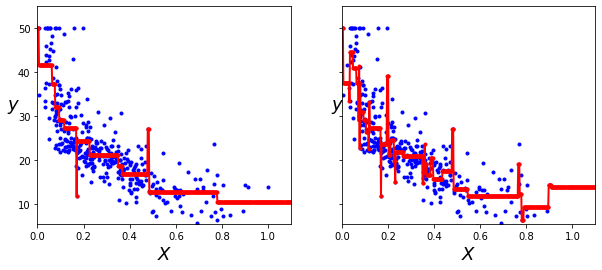

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_regression_predictions(tree_reg, X, y, axes=[-10, 10, -10, 10], xlabel="$X$", ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel(xlabel, fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2)

def dt_reg_viz(X_train, y_train):
  from sklearn.tree import DecisionTreeRegressor

  tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=4)
  tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=6)

  tree_reg1.fit(X_train, y_train)
  tree_reg2.fit(X_train, y_train)

  fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
  axes_reg =[np.min(X_train)*1.1, np.max(X_train)*1.1, np.min(y_train)*1.1, np.max(y_train)*1.1]

  plt.sca(axes[0])
  plot_regression_predictions(tree_reg1, X_train, y_train, axes=axes_reg)

  plt.sca(axes[1])
  plot_regression_predictions(tree_reg2, X_train, y_train,axes=axes_reg)

  plt.show()

dt_reg_viz(boston_X_train_scale, boston_y_train)

### DecisionTree Regressor


**- sklearn.tree.[DecisionTreeRegressor(*, criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) : Returns the instance itself.**

A decision tree regressor.

In [27]:
from sklearn.tree import DecisionTreeRegressor

tree_reg_boston = DecisionTreeRegressor(random_state=42)
tree_reg_boston.fit(boston_X_train_scale, boston_y_train)

DecisionTreeRegressor(random_state=42)

#### Evaluation

In [28]:
from sklearn import metrics

predict = tree_reg_boston.predict(boston_X_train_scale)
r2 = metrics.r2_score(boston_y_train, predict)
print('Train r2(boston with a feature): {}'.format(r2))


predict = tree_reg_boston.predict(boston_X_test_scale)
r2 = metrics.r2_score(boston_y_test, predict)
print('Test r2(boston with a feature): {}'.format(r2))

Train r2(boston with a feature): 0.957999081711317
Test r2(boston with a feature): 0.4182666340731448


## Improving performance

### Setup

In [29]:
# common lib
import sklearn
import numpy as np

### Datasets



#### Boston housing prices dataset

* The Boston housing prices dataset has an ethical problem. You can refer to the documentation of this function for further details.

In [30]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()
boston_X = boston.data
boston_y = boston.target

pd.DataFrame(boston_X, columns=boston.feature_names).head(3)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


### Preprocess

#### model based feature selection (3 features)

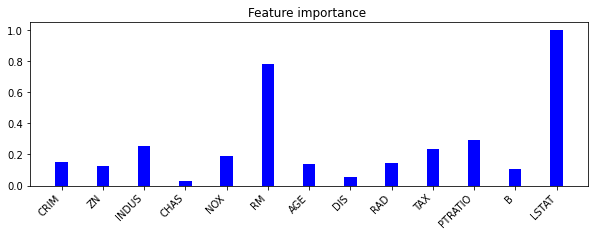

(array([ 5, 10, 12]),)
(506, 13)
(506, 3)


In [31]:
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import f_regression, SelectPercentile
from sklearn.preprocessing import scale

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

ft = {}
ft['score'] = f_regression(scale(boston_X),boston_y)[0]
ft['scaled_score'] = ft['score'] / np.max(ft['score'])

# Plot scores
x = np.arange(len(boston.feature_names))
fig, ax1 = plt.subplots(1, 1, figsize=(10, 3))
w = 0.3

m1 = ax1.bar(x, ft['scaled_score'][x], width=w, color='b', align='center')

ax1.set_xticks(range(len(boston.feature_names)))
ax1.set_xticklabels(boston.feature_names, rotation=45, ha="right");
plt.title("Feature importance ")               
plt.show()

indices = np.where((boston.feature_names=='LSTAT') | (boston.feature_names=='RM') | (boston.feature_names=='PTRATIO'))
print(indices)
print(boston["data"].shape)
boston_X_three = boston["data"][:, indices].reshape(-1,3)
print(boston_X_three.shape)

#### train_test_split

In [32]:
from sklearn.model_selection import train_test_split
boston_X_train_three, boston_X_test_three, boston_y_train, boston_y_test = train_test_split(boston_X_three, boston_y, random_state=42)

#### Scaling

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
boston_X_train_scale_three = scaler.fit_transform(boston_X_train_three)
boston_X_test_scale_three = scaler.transform(boston_X_test_three)
pd.DataFrame(boston_X_train_scale_three).head(3)

,0,1,2
0,0.669514,0.553191,0.085265
1,0.465528,0.223404,0.366722
2,0.804759,0.244681,0.056015


### Make Decision Tree Regressor

In [34]:
from sklearn.tree import DecisionTreeRegressor

tree_reg_boston_select = DecisionTreeRegressor(random_state=42)
tree_reg_boston_select.fit(boston_X_train_scale_three, boston_y_train)

DecisionTreeRegressor(random_state=42)

#### Evaluation

**1 feature performance**

* Train r2(boston with a feature): 0.957999081711317
* Test r2(boston with a feature): 0.4182666340731448

In [35]:
from sklearn import metrics

predict = tree_reg_boston_select.predict(boston_X_train_scale_three)
r2 = metrics.r2_score(boston_y_train, predict)
print('Train r2(select 3 features): {}'.format(r2))


predict = tree_reg_boston_select.predict(boston_X_test_scale_three)
r2 = metrics.r2_score(boston_y_test, predict)
print('Test r2(select 3 features): {}'.format(r2))

Train r2(select 3 features): 1.0
Test r2(select 3 features): 0.45562503862438564


### Validation_curve(ccp_alpha)

**ccp_alpha**
  * Complexity parameter used for Minimal Cost-Complexity Pruning.

* Visualization 함수

In [36]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# 수치형 파라미터 시각화 함수
def viz_val_curve(param_range, train_mean, train_std, test_mean, test_std, param_name, xscale_log=False):
  plt.plot(param_range, train_mean, 
          color='blue', marker='o', 
          markersize=5, label='Training accuracy')

  plt.fill_between(param_range, train_mean + train_std,
                  train_mean - train_std, alpha=0.15,
                  color='blue')

  plt.plot(param_range, test_mean, 
          color='green', linestyle='--', 
          marker='s', markersize=5, 
          label='Validation accuracy')

  plt.fill_between(param_range, 
                  test_mean + test_std,
                  test_mean - test_std, 
                  alpha=0.15, color='green')


  plt.grid()
  plt.legend(loc='lower right')
  if xscale_log:
    plt.xscale('log')
  plt.xlabel(param_name)
  plt.ylabel('Accuracy')
  plt.ylim([np.min(test_mean)*0.8, np.max(train_mean)*1.2])
  plt.tight_layout()
  plt.show()

# 범주형 파라미터 시각화 함수
def viz_val_bar(param_range, train_mean, train_std, test_mean, test_std, param_name):
  idx = np.arange(len(param_range))
  plt.bar(idx, test_mean, width=0.3)
  plt.xlabel(param_name)
  plt.ylabel('Accuracy')
  plt.ylim([np.min(test_mean)*0.9, np.max(test_mean)*1.1])
  plt.xticks(idx, param_range, fontsize=15)
  plt.show()

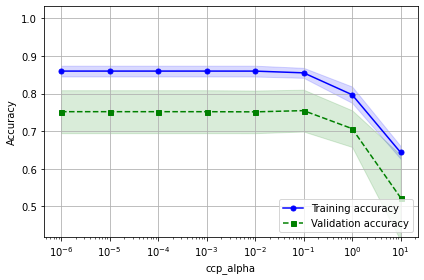

In [37]:
from sklearn.model_selection import validation_curve

param_range= [10**i for i in range(-6,2)]
param_name='ccp_alpha'

from sklearn.tree import DecisionTreeRegressor

tree_reg_boston_ccp = DecisionTreeRegressor(max_depth=6, min_samples_leaf=6, random_state=42)
tree_reg_boston_ccp.fit(boston_X_train_scale_three, boston_y_train)

train_scores, test_scores = validation_curve(
                estimator=tree_reg_boston_ccp, 
                X=boston_X_train_scale_three, 
                y=boston_y_train, 
                param_name=param_name, 
                param_range=param_range,
                cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

viz_val_curve(param_range, train_mean, train_std, test_mean, test_std, param_name, xscale_log=True)

#### Evaluation

In [38]:
from sklearn.tree import DecisionTreeRegressor

proper_model_boston_ccp = DecisionTreeRegressor(max_depth=6, min_samples_leaf=6, ccp_alpha=10**-1, random_state=42)
proper_model_boston_ccp.fit(boston_X_train_scale_three, boston_y_train)

from sklearn import metrics

predict = proper_model_boston_ccp.predict(boston_X_train_scale_three)
r2 = metrics.r2_score(boston_y_train, predict)
print('Train r2(ccp_alpha): {}'.format(r2))


predict = proper_model_boston_ccp.predict(boston_X_test_scale_three)
r2 = metrics.r2_score(boston_y_test, predict)
print('Test r2(ccp_alpha): {}'.format(r2))

Train r2(ccp_alpha): 0.8543263803290309
Test r2(ccp_alpha): 0.7429037034366851


#### Result
**Best performance**
* Train r2(min_samples_leaf): 0.8618598401408437
* Test r2(min_samples_leaf): 0.7489877936270759



```python
DecisionTreeRegressor(max_depth=6, min_samples_leaf=6, ccp_alpha=10**-1, random_state=42)
```



# Exercise

## 1번 문제
DecisionTreeClassifier을 사용하여 Wine 데이터를 분류 하시오.

  * Validation_curve 함수를 사용하여 아래 Hyperparameters의 변화에 따른 결과를 그래프로 표현하시오.
    * max_depth
    * min_samples_leaf
    * criterion
  * 가장 높은 accuracy를 기록하는 파리미터 조합을 도출하시오.

  ```python
  from sklearn.datasets import load_wine

  wine = load_wine()
  ```


## 1번 문제 답안

In [39]:
#1번 문제 답안

## 2번 문제
DecisionTreeClassifier을 사용하여 Breast cancer 데이터를 분류 하시오.

  * Validation_curve 함수를 사용하여 아래 Hyperparameters의 변화에 따른 결과를 그래프로 표현하시오.
    * max_depth
    * min_samples_leaf
    * criterion
  * 가장 높은 accuracy를 기록하는 파리미터 조합을 도출하시오.

  ```python
  from sklearn import datasets
  import pandas as pd

  breast = datasets.load_breast_cancer()
  breast_X = breast["data"]
  breast_y = breast["target"]
  breast_feature_name = breast.feature_names

  pd.DataFrame(breast_X, columns=breast_feature_name).head(5)
  ```

## 2번 문제 답안

In [40]:
#2번 문제 답안

## 3번 문제
DecisionTreeRegressor를 사용하여 Forest CoverType 데이터를 분류 하시오.

  * Validation_curve 함수를 사용하여 아래 Hyperparameters의 변화에 따른 결과를 그래프로 표현하시오.
    * max_depth, 
    * min_samples_leaf
    * ccp_alpha
  * 가장 높은 r2를 기록하는 파리미터 조합을 도출하시오.

  

#### Forest CoverType dataset
* Characteristic data of forest covertype
* Predict which type of covertype belongs to
* https://archive.ics.uci.edu/ml/datasets/Covertype 
* $Y$: discrete, 
  * $X_{0 ∼ 9}$: continuous
  * $X_{10 ∼ 53}$: discrete

  ```python
  #load data
  from sklearn.datasets import fetch_covtype
  import pandas as pd

  covtype = fetch_covtype()
  covtype_X = covtype.data[:,:10]
  covtype_y = covtype.target

  covtype_feature_name = covtype.feature_names[0:10]
  print('Number of targets: ',len(set(covtype_y)))

  pd.DataFrame(covtype_X, columns=covtype_feature_name).head(3)
  ```



## 3번 문제 답안

In [41]:
#3번 문제 답안